<a href="https://colab.research.google.com/github/RaivoKasepuu/LTAT_02_020/blob/main/Praktikum_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum 4

*Praktikum baseerub Anna Leontjeva loodud materjalil*


## 1. Eeltöö andmetega

Tänases praktikumis jätkame juba tuttava tehingute andmefaili analüüsimisega. Siiani oleme õppinud, kuidas andmeid `Pandas` teegi abil andmefreimi lugeda, kuidas leida andmefreimist mingitele tingimustele vastavaid ridu ja veerge, kuidas arvutada andmetele erinevaid statistilisi näitajaid ja kuidas andmetest `plotnine` ja `matplotlib` teekide abil lihtsamaid kirjeldavaid jooniseid teha. 

Teeme esmalt läbi mõned andmete eeltöötluse sammud, tuletame kiirelt meelde statistikute arvutamise ning loome ka paar joonist. Alustame taaskord andmete sisselugemisest ning nende vaatamisest. Aga esmalt impordime vajaliku teegi!


In [ ]:
import pandas as pd
#impordime lisaks ka numpy andmete töötluseks,
import numpy as np
#plotnine, matplotlib visualiseerimiseks
import plotnine as p9
import matplotlib.pyplot as plt
#ja sklearn teegi vahendid klasterdamiseks
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#hangime andmefaili kursuse kodulehelt - NB! see ei ole Pythoni kood!
!wget https://courses.cs.ut.ee/2021/atva_stataine/fall/uploads/Main/tehingud_v3.csv

#loeme andmed andmefreimi
tehingud = pd.read_csv("tehingud_v3.csv")

#ja vaatame andmefreimi esimesi ridu
display(tehingud.head(3))

--2021-10-21 11:16:23--  https://courses.cs.ut.ee/2021/atva_stataine/fall/uploads/Main/tehingud_v3.csv
Resolving courses.cs.ut.ee (courses.cs.ut.ee)... 193.40.36.57, 193.40.36.55
Connecting to courses.cs.ut.ee (courses.cs.ut.ee)|193.40.36.57|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /LTAT.02.020/2021_fall/uploads/Main/tehingud_v3.csv [following]
--2021-10-21 11:16:24--  https://courses.cs.ut.ee/LTAT.02.020/2021_fall/uploads/Main/tehingud_v3.csv
Reusing existing connection to courses.cs.ut.ee:443.
HTTP request sent, awaiting response... 200 OK
Length: 133961 (131K) [text/csv]
Saving to: ‘tehingud_v3.csv.1’

tehingud_v3.csv.1   100%[===================>] 130.82K   308KB/s    in 0.4s    

2021-10-21 11:16:25 (308 KB/s) - ‘tehingud_v3.csv.1’ saved [133961/133961]



,tehingu_id,tehingu_kuupäev,kliendi_id,ostusumma,maksevahend
0,1,2015-09-04,1,146.72,arve
1,2,2015-05-15,2,86.96,sularaha
2,3,2017-05-23,2,17.68,kaart


Hea oleks teada ka näiteks meie andmetabeli suurust, tulpades esinevaid andmetüüpe ja seda, kas andmetes esineb puuduvaid väärtusi.

In [ ]:
#andmefreimi mõõtmed atribuudi shape abil
print("Andmefreimi mõõtmed:", tehingud.shape, "\n") #esimene nr näitab ridade, teine tulpade arvu

#kas andmetes esineb puuduvaid väärtusi
print("Puuduvad väärtused:")
tehingud.isnull().sum()

Andmefreimi mõõtmed: (4181, 5) 

Puuduvad väärtused:


tehingu_id         0
tehingu_kuupäev    0
kliendi_id         0
ostusumma          0
maksevahend        0
dtype: int64

Teeme väikese kõrvalepõike ja peatume hetkeks viimasel jooksutatud koodireal `tehingud.isnull().sum()`. Mis siis sisuliselt toimub? Püüame meenutada teist praktikumi, kus meil oli juttu tõeväärtustest ja andmefreimist tingimuse abil väärtuste leidmisest. Ka siin kehtib sarnane loogika. Vaatame, mis juhtub, kui jooksutada üksnes `tehingud.isnull()`

In [ ]:
print(tehingud.isnull())

print("\nSaame järgmist tüüpi muutuja:", type(tehingud.isnull()))

      tehingu_id  tehingu_kuupäev  kliendi_id  ostusumma  maksevahend
0          False            False       False      False        False
1          False            False       False      False        False
2          False            False       False      False        False
3          False            False       False      False        False
4          False            False       False      False        False
...          ...              ...         ...        ...          ...
4176       False            False       False      False        False
4177       False            False       False      False        False
4178       False            False       False      False        False
4179       False            False       False      False        False
4180       False            False       False      False        False

[4181 rows x 5 columns]

Saame järgmist tüüpi muutuja: <class 'pandas.core.frame.DataFrame'>


Näeme, et tulemuseks on andmefreim, mis sisaldab tõeväärtusi. Kui kutsume andmefreimi peal välja `.isnull()` meetodi, siis käib Python selle andmefreimi kõik väärtused ükshaaval läbi ja vastab igaühe kohta `True` (on puuduv väärtus ehk `NULL`) või `False` (ei ole puuduv väärtus).

Sellel andmefreimil saame välja kutsuda meetodi `.sum()`, mis arvutab tõeväärtuste summa nii, et iga `True` väärtuseks loetakse 1 ja iga `False` väärtuseks 0. Seega loetakse sisuliselt kokku tõesed tõeväärtused. Oluline on märgata, et `.sum()` toimetab veergude kaupa - saame tulemuse iga veeru jaoks eraldi nagu üleeelmise koodikasti väljundis näha oli.


Pöördume tagasi oma andmete juurde. Tahtsime vaadata veel tulpade andmetüüpe.

In [ ]:
#tulpade andmetüübid atribuudi dtypes abil
print("Tulpade andmetüübid:")
print(tehingud.dtypes)

Tulpade andmetüübid:
tehingu_id           int64
tehingu_kuupäev     object
kliendi_id           int64
ostusumma          float64
maksevahend         object
dtype: object


Tehingu kuupäeva juures on hetkel andmetüüp objekt. Pythonis viitab see sisuliselt sellele, et tulbas on kas sõnelised või sõnelised ja numbrilised väärtused. Vaatame, kas meil õnnestub küsida, kui pikk vahe on kõige varasema ja kõige hilisema kuupäeva vahel. 

In [ ]:
#kuupäevade vahe?
print(tehingud["tehingu_kuupäev"].max() - tehingud["tehingu_kuupäev"].min())

TypeError: ignored

Tundub, et päris nii siiski ei saa. Näeme veateatest, et üksikud kuupäevad on sõne andmetüüpi ja nendega lahutustehet teha ei saa.

Selliste tehete ja võrdluste jaoks peame teisendama andmed kuupäeva andmetüüpi. Teeme seda andmefreimile omase meetodi `.to_datetime()` abil.

In [ ]:
#muudame tulba andmetüübi
tehingud['tehingu_kuupäev'] = pd.to_datetime(tehingud['tehingu_kuupäev'])

#vaatame, kas muutus õnnestus
print("Tulpade uued andmetüübid:")
print(tehingud.dtypes, "\n")

Tulpade uued andmetüübid:
tehingu_id                  int64
tehingu_kuupäev    datetime64[ns]
kliendi_id                  int64
ostusumma                 float64
maksevahend                object
dtype: object 



In [ ]:
#kas nüüd saame kuupäevade vahemiku pikkust vaadata?
print("Kuupäevade vahe on:", tehingud["tehingu_kuupäev"].max() - tehingud["tehingu_kuupäev"].min(), "\n")

#vaatame ka konkreetset kuupäevade vahemikku, kust andmed pärinevad
print("Varaseim tehing:", tehingud["tehingu_kuupäev"].min(), "\n")
print("Hiliseim tehing:", tehingud["tehingu_kuupäev"].max())

Kuupäevade vahe on: 2187 days 00:00:00 

Varaseim tehing: 2013-01-04 00:00:00 

Hiliseim tehing: 2018-12-31 00:00:00


## 2. Statistikud ja visualiseerimine

Kõige kiirema ja lihtsama ülevaate ühe arvulisi väärtusi sisaldava tulba kohta saime meetodi `.describe()` abil. Vaatame lähemalt nt ostusumma tulpa.

In [ ]:
#vaatame kogu kirjeldust
print(tehingud["ostusumma"].describe(), "\n")

#või nt ainult keskmist väärtust
print(tehingud["ostusumma"].mean(), "\n")

#ümardame keskmise kahe komakohani
print(round(tehingud["ostusumma"].mean(), 2))

count    4181.000000
mean       56.250215
std        45.839092
min         0.060000
25%        21.120000
50%        45.830000
75%        78.960000
max       364.330000
Name: ostusumma, dtype: float64 

56.25021525950731 

56.25


Erinevate statistikute visualiseerimiseks sobis hästi karpdiagramm. Näiteks võisime võrrelda statistikuid eri maksevahendite kaupa.

**Küsimus:** Mida kirjutada x, y ja fill väärtusteks?

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


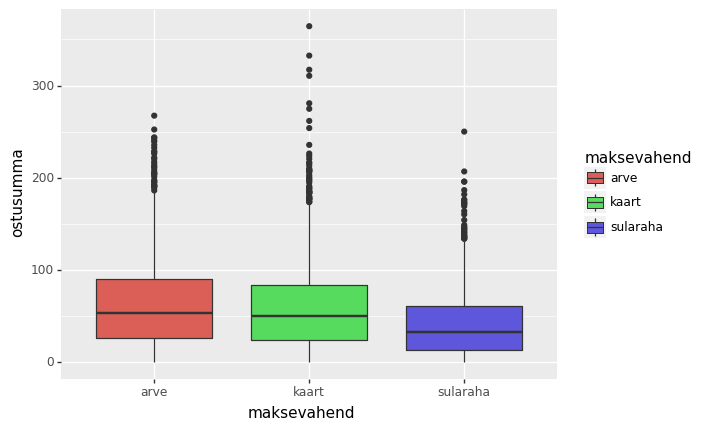

<ggplot: (8790750893457)>

In [ ]:
#esimene kiht - määrame andmestiku ja kasutatava tulba
#kujutame seost maksevahendi ja ostusumma vahel
(p9.ggplot(data = tehingud,
           mapping=p9.aes(x="maksevahend", y="ostusumma", fill="maksevahend")) #värvime iga maksevahendi eri värvi
    #teine kiht - lisame karpdiagrammi
    + p9.geom_boxplot())

Teise võimalusena võime vaadata, kuidas ostusumma statistilised näitajad ajas muutunud on. Võtame selle jaoks kuupäevast ainult aasta, kuna muidu oleks meil vaadeldavaid punkte lihtsalt liiga palju. Iga päeva ostusummade statistikuid ei ole mõtet välja arvutada, eriti kuna paljudel päevadel on vaid üks tehing.

NB! Eelmises praktikumis eraldasime me aastaarvu sõne kujul esitatud kuupäevast. Lõikusime sõne selle jaoks tükkideks (aasta, kuu, päev) ning võtsime tükkide järjendist üksnes esimese tüki ehk aasta. 

Seekord teisendasime oma kuupäevad `datetime` andmetüüpi, ning aasta saame seda tüüpi muutujast kätte spetsiaalse `.strftime()` meetodi abil. Kui anname meetodile argumendiks `"%Y"`, saame kuupäeva andmetüüpi kuupäevadest kätte sõne kujul aasta. Kuna rakendame meetodit kogu tulbale, siis luuakse aasta iga andmefreimis oleva kuupäeva kohta.


,tehingu_id,tehingu_kuupäev,kliendi_id,ostusumma,maksevahend,aasta
0,1,2015-09-04,1,146.72,arve,2015
1,2,2015-05-15,2,86.96,sularaha,2015
2,3,2017-05-23,2,17.68,kaart,2017
3,4,2017-10-24,2,83.84,arve,2017
4,5,2015-10-13,2,31.52,arve,2015


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


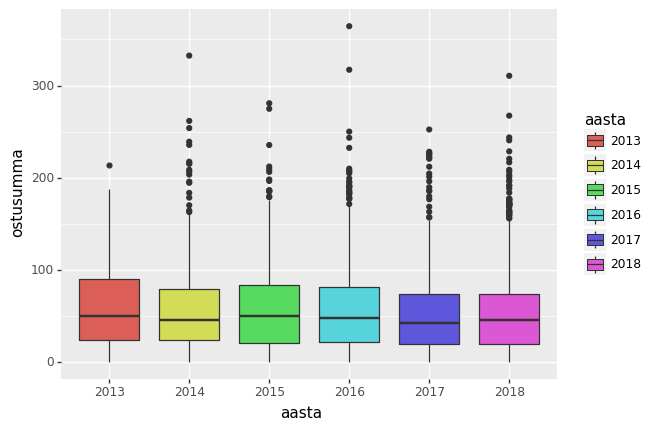

<ggplot: (8790750836605)>

In [ ]:
#tekitame veeru nimega 'aasta'
tehingud['aasta'] = tehingud['tehingu_kuupäev'].dt.strftime('%Y')
display(tehingud.head())

#loome iga aasta kohta karpdiagrammi
#esimene kiht - määrame andmestiku ja kasutatava tulba
(p9.ggplot(data = tehingud,
           mapping=p9.aes(x="aasta", y="ostusumma", fill="aasta")) #värvime iga aasta eri värvi
    #teine kiht - lisame karpdiagrammi
    + p9.geom_boxplot())

Võime valida ka ühe aasta ning teha analüüsi kuude kaupa. 

**Ülesanne:** Proovi alljärgnevas koodis kolme punktiga (...) tähistatud lüngad ise täita ning kood tööle saada.

In [ ]:
#vaatame ainult aastat 2015
#valime loc abil andmefreimi read, kus aasta tulba väärtus on 2015
#NB! aasta väärtus on antud sõnena
tehingud_2015 = tehingud.loc[tehingud["aasta"] == "2015"]

#tekitame veeru nimega 'kuu'
#kui kuupäevast aasta saamiseks kasutasime argumenti %Y, siis kuu saame %m abil
tehingud_2015['kuu'] = tehingud_2015['tehingu_kuupäev'].dt.strftime("%m")

#vaatame loodud andmefreimi
display(tehingud_2015.head())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,tehingu_id,tehingu_kuupäev,kliendi_id,ostusumma,maksevahend,aasta,kuu
0,1,2015-09-04,1,146.72,arve,2015,09
1,2,2015-05-15,2,86.96,sularaha,2015,05
4,5,2015-10-13,2,31.52,arve,2015,10
9,10,2015-11-26,3,212.20,arve,2015,11
20,21,2015-08-16,7,93.61,arve,2015,08


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


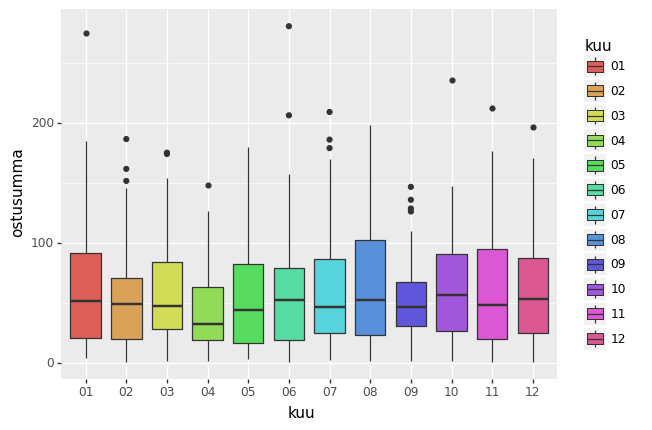

<ggplot: (8790750738545)>

In [ ]:
#loome iga kuu kohta karpdiagrammi ja värvime iga kuu eri värvi
#esimene kiht - määrame andmestiku ja kasutatava tulba
(p9.ggplot(data = tehingud_2015,
           mapping=p9.aes(x="kuu", y="ostusumma", fill="kuu")) 
    #teine kiht - lisame karpdiagrammi
    + p9.geom_boxplot()
)

Karpdiagrammide mure on see, et nad ei näita meile, kui suure väärtuste hulga  pealt nad oma statistikud arvutavad. Seega ei väljenda karpidagrammid näiteks seda, mitu tehingut igal aastal (või kuul) sooritati. Seda saame vaadata tulpdiagrammi abil.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


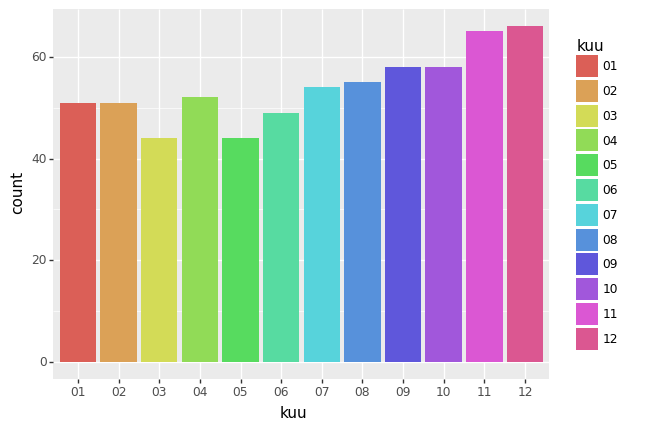

<ggplot: (8790755989093)>

In [ ]:
#esimene kiht - määrame andmestiku ja kasutatava tulba
(p9.ggplot(data = tehingud_2015,
           mapping=p9.aes(x="kuu", fill="kuu")) #värvime iga ku eri värvi
    #teine kiht - lisame tulpiagrammi
    + p9.geom_bar()
)

Näeme näiteks, et kõige vähem tehinguid tehti märtsis ja mais. Kõige suurema tehingute arvuga kuud olid november ja detsember. Seda võiks päris andmete puhul seostada näiteks jõulukinkide ostmisega. 

Praegusel joonisel teevad värvid pilti lihtsalt pisut ilusamaks, aga mingit informatsiooni sinna juurde ei lisa. Veidi sisukamalt saame värve kasutada nii, et värvime taaskord iga maksevahendiga tehtud tehingud eri värvi. 

**Küsimus:** Kuidas seda teha? Mida koodis muuta?

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


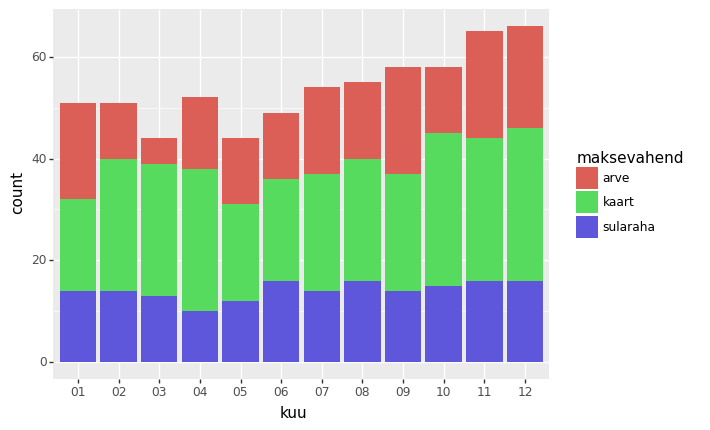

<ggplot: (8790756351605)>

In [ ]:
#esimene kiht - määrame andmestiku ja kasutatava tulba
(p9.ggplot(data = tehingud_2015,
           mapping=p9.aes(x="kuu", fill="maksevahend")) #NB! värvime iga maksevahendi eri värvi
    #teine kiht - lisame tulpiagrammi
    + p9.geom_bar()
)

Nüüd näeme ka seda, et kuigi märtsis ja mais tehti sama arv tehinguid, siis märtsis oli arvega tasutud tehingute hulk väiksem.

**Kodus mõtlemiseks:** Kas meie tehingute andmetes on tulpasid, mille vahelist seost oleks mõistlik kujutada hajusdiagrammiga? Aga mida võiksime kujutada histogrammiga?

## 3. Klientide klasterdamine

Nüüd vaatame, kuidas leida andmetest sarnase käitumisega kliente, ehk kuidas andmeid **kindlate tunnuste abil klasterdada ehk segmenteerida**. Eelmises õppematerjalis oli teil juttu **k-keskmiste algoritmist** ning HSV mudelist. Just nende abi me järgmise ülesande puhul vajamegi.

Pole põhjust muretseda - k-keskmiste algoritmi koodi me ise nullist kirjutama ei pea, see töö on meie eest juba ära tehtud. Võtame lihtsalt riiulist uue tööriistakasti, ehk Pythoni teegi nimega `sklearn`.

Küll peame aga enne määrama, milliste tunnuste abil kliente klasterdada tahame. Nendeks tunnusteks arvutame välja **HSV komponendid**:
- **hiljutisus,**
- **sagedus,**
- **väärtus.**

**Küsimus:** Püüame õppematerjalist meelde tuletada, mida need kolm tunnust väljendavad. Mäng käib aususe peale, ärge enne alt vastuseid piiluge, kui olete oma sõnadega selgituse välja mõelnud!



### 3.1 HSV komponendid

**Hiljutisus** on sel juhul defineeritud kui päevade arv, mis jääb **kliendi viimase tehingu** ja raporteerimisaja vahele. Seega kui klient sooritas oma tehingud näiteks 2018-07-09, 2018-12-13 ja 2018-12-28, siis on tema hiljutisus 3 päeva.

Kliendi **sageduse** leidmiseks loeme lihtsalt taas kokku kõik tema tehingud. Saame selleks kasutada juba tuttavat `.count()` funktsiooni. 

Kliendi **väärtus** on kõigi tema ostusummade kogusumma. 

Esmalt määrame nö raporteerimisaja, ehk selle hetke, mil me tehingute andmestikku analüüsima hakkasime. Oletame, et selleks hetkeks oli viimase tehingu sooritamise kuupäev ehk 2018-12-31. 

In [ ]:
#määrame raporteerimisaja
raport_aeg = np.max(tehingud["tehingu_kuupäev"])
print(raport_aeg)

2018-12-31 00:00:00


Ning seejärel hakkame looma uut andmefreimi, kus oleks neli tulpa:
- kliendi id,
- sagedus,
- väärtus,
- hiljutisus.

Teeme selle protsessi esmalt läbi teile tuttavate vahenditega, mida oleme siiani praksides käsitlenud. Ideaalne võimalus üle korrata andmefreimide grupeerimist ja soovi korral ka näiteks for-tsükli kasutamist!

In [ ]:
#grupeerin andmed kliendi kaupa ja loen iga kliendi tehingud kokku -> sagedus
sagedus = tehingud.groupby(["kliendi_id"])["tehingu_id"].count()
print(sagedus)

kliendi_id
1        1
2        8
3        7
4        1
5        2
        ..
996      2
997      2
998      8
999      3
1000    19
Name: tehingu_id, Length: 1000, dtype: int64


In [ ]:
#grupeerin tehingud kliendi kaupa ja leian kliendi ostusummade summa -> väärtus
väärtus = tehingud.groupby(["kliendi_id"])["ostusumma"].sum()
print(väärtus)

kliendi_id
1        146.72
2        381.76
3        613.99
4          2.34
5        214.40
         ...   
996       54.56
997      168.39
998      359.18
999       80.91
1000    1016.12
Name: ostusumma, Length: 1000, dtype: float64


In [ ]:
#grupeerin tehingud kliendi kaupa ja võtan iga kliendi kõige hilisema kuupäeva
#lahutan kuupäeva raporteerimise ajast -> hiljutisus
hiljutisus = raport_aeg - tehingud.groupby(["kliendi_id"])["tehingu_kuupäev"].max()
print(hiljutisus, "\n")

#vaatame, mis kujul ühe kliendi hiljutisus meile antakse
print("Üks hiljutisus:", hiljutisus.iloc[0])
#ja mis tüüpi see on 
print("Andmetüüp:", type(hiljutisus.iloc[0]))

kliendi_id
1      1214 days
2       433 days
3       143 days
4       177 days
5       264 days
          ...   
996    1122 days
997     128 days
998       9 days
999     298 days
1000    123 days
Name: tehingu_kuupäev, Length: 1000, dtype: timedelta64[ns] 

Üks hiljutisus: 1214 days 00:00:00
Andmetüüp: <class 'pandas._libs.tslibs.timedeltas.Timedelta'>


In [ ]:
#me tahame siit kätte saada ainult päevade numbri 
#võtame atribuudi days abil ainult päevade arvu ja salvestame tulemuse (kirjutame algsemuutuja üle)
hiljutisus = hiljutisus.dt.days
print(hiljutisus, "\n")
print("Üks hiljutisus:", hiljutisus.iloc[0])
print("Andmetüüp:", type(hiljutisus.iloc[0]))

kliendi_id
1       1214
2        433
3        143
4        177
5        264
        ... 
996     1122
997      128
998        9
999      298
1000     123
Name: tehingu_kuupäev, Length: 1000, dtype: int64 

Üks hiljutisus: 1214
Andmetüüp: <class 'numpy.int64'>


**Kodus harjutamiseks:** Tegelikult on see ideaalne võimalus ka for-tsükli harjutamiseks. Püüa allolevas koodikastis lüngad täita ja igast hiljutisuse `timedelta` tüüpi elemendist for tsükli abil päevade arv välja võtta.

In [ ]:
#enne teisendasime päevadeks kogu seeria korraga
#nüüd teeme seda ühe elemendi kaupa ja käime for tsükliga kõik elemendid läbi
#ühest timedelta elemendist saame arvu kätte nii:
print("Üksnes päevade number:",hiljutisus.iloc[0].days)

#nüüd tahame sellesama triki teha iga kliendi hiljutisuse jaoks
uus_hiljutisus = ... #loo uus tühi järjend, kuhu hakkame tsüklis lisama päevade arvusid
for ... in ...: #käime hiljutisuse seeria elementhaaval läbi
  päev = ....days #võtame hetkel vaadeldavast elemendist välja ainult päevade arvu
  uus_hiljutisus.append(...) #lisame selle päevade arvu uude järjendisse

Praeguseks oleme loonud kolm seeriat: sagedus, väärtus ja hiljutisus. Paneme need nüüd andmefreimiks kokku. Selleks on kõige lihtsam paigutada andmed sõnastikku, mille saab mugavalt andmefreimiks teisendada. Tuletame meelde, et sõnastik oli kujul `sõnastik = {"võti1": väärtus1, "võti2": väärtus2}`

In [ ]:
#ja lõpuks paneme selle kõik üheks andmefreimiks kokku
#selleks loome sõnastiku, kus määrame võtmeks tulba nime (sagedus, väärtus, hiljutisus)
#ja anname võtmele väärtuseks vastava seeria (sagedus, väärtus) või järjendi (hiljutisus)
sõnastikuna = {'sagedus': sagedus, 'väärtus': väärtus, 'hiljutisus': hiljutisus}
#teisendame sõnastiku andmefreimiks
hsv = pd.DataFrame(sõnastikuna)
display(hsv.head())

,sagedus,väärtus,hiljutisus
kliendi_id,,,
1,1,146.72,1214
2,8,381.76,433
3,7,613.99,143
4,1,2.34,177
5,2,214.40,264


**Küsimus:** Mis infot saame iga kliendi kohta äsjaloodud andmestikust lugeda?

Ja nüüd vaatame, kuidas teha sedasama hoopis `.agg()` funktsiooni abiga, mis lubab antud juhul grupeeritud andmete tulpadele teatud funktsioone rakendada. Soovi korral loe funktsiooni kohta lähemalt [siit](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html).

In [ ]:
# defineerime funktsiooni, mis arvutab hiljutisuse
def tellimuse_hiljutisus(x): 
    return min(raport_aeg - x)

hsv2 = tehingud.groupby("kliendi_id").agg({"kliendi_id": "count", 
                                    "ostusumma":"sum",
                                   "tehingu_kuupäev": tellimuse_hiljutisus})
hsv2.columns = ["sagedus", "väärtus", "hiljutisus"]
hsv2["hiljutisus"] = hsv2["hiljutisus"].dt.days
display(hsv2.head())

,sagedus,väärtus,hiljutisus
kliendi_id,,,
1,1,146.72,1214
2,8,381.76,433
3,7,613.99,143
4,1,2.34,177
5,2,214.40,264


In [ ]:
#vaatame ka statistikuid
print(hsv.describe())

           sagedus      väärtus   hiljutisus
count  1000.000000  1000.000000  1000.000000
mean      4.181000   235.182150   427.511000
std       3.437449   230.676366   457.813046
min       1.000000     0.090000     0.000000
25%       2.000000    72.050000   103.000000
50%       3.000000   168.015000   265.500000
75%       6.000000   328.220000   565.750000
max      21.000000  1743.520000  2144.000000


### 3.2 K-keskmiste analüüs

Nüüd jõuame tõesti lõpuks k-keskmiste algoritmi ja klientide nende kolme tunnuse abil segmenteerimiseni. 

**Küsimus:** Püüa k-keskmiste algoritmi lühidalt oma sõnadega kirjeldada, enne kui alt vastust piilud!

K-keskmiste algoritm lühidalt:

- Initsialiseerimine: Tööd alustades valib algoritm juhuslikult K suvalist andmepunkti, mida nimetame keskpunktideks. Nende puhktide ümber hakkab algoritm klastreid moodustama. Oma näites soovime leida kolme klastrit, seega K=3.

- Ülesande samm: Klastrite loomiseks arvutame kõikide teiste punktide sarnasuse nende kolme
keskpunktiga. Siinkohal kasutatakse sarnasusena eukleidilist kaugust: mida lähemal on punktid, seda sarnasemad nad on.

  Iga andmepunkti puhul vaatame, millisele kolmest keskpunktist on ta kõige lähemal ja määrame ta seejärel lähima keskpunktiga samasse gruppi. Jätkame, kuni kõik punktid on jagatud kolme grupi vahel.

- Uuenduse samm: Arvutame tekkinud klastrite tegelikud keskpunktid, kasutades neid punkte, mis klastrisse määrati. Seejärel arvutame uuesti iga punkti kauguse äsjaleitud keskpunktidest - mõned punktid võivad selle tagajärjel klastrit vahetada.

Kordame kuni klastrid enam ei muutu - järeldame, et kõik punktid on sobivasse klastrisse määratud.




#### 3.2.1 Tunnuste skaleerimine

Hetkel oleme me lugenud kliendi **sagedust** kordades (1 kuni 21), **väärtus** on pidev arv (0.09 kuni 1743.52) ja **hiljutisus** on mõõdetud päevades (0 kuni 2144). Näeme, et erinevate tunnuste maksimaalsed (ja ka keskmised) väärtused erinevad lausa 100 korda. Seega, kui me arvutame ja võrdleme eukleidilist kaugust nende numbrite vahel, siis võrdleme nö õunu apelsinidega. 

Selleks, et meie tunnused **viia sarnasele skaalale** saame kasutada **skaleerimist miinimumi ja maksimumiga**:

$$x_{skaleeritud} = \frac{x_{originaal} - min(x)}{max(x) - min(x)} $$

Seda ei pea me ise käsitsi välja arvutama, sest `sklearn` teegis on vastav tööriist olemas.

In [ ]:
#alguses kutsume välja skaleerimistööriista ja salvestame selle muutujasse
skaleerimine = MinMaxScaler() 

#ja siis rakendame tööriista meetodit fit_transform meie andmetel
hsv_scaled = skaleerimine.fit_transform(hsv) 

#vaatame, mis välja tuli
print(hsv_scaled)

[[0.         0.08410432 0.56623134]
 [0.35       0.21891903 0.20195896]
 [0.3        0.35212197 0.06669776]
 ...
 [0.35       0.20596755 0.00419776]
 [0.1        0.04635689 0.13899254]
 [0.9        0.58277648 0.0573694 ]]


Näeme, et meie andmestikus on endiselt 3 tulpa: sagedus, väärtus ja hiljutisus, aga kõik väärtused on vahemikus (0..1) ehk sarnasel skaalal ja omavahel võrreldavad.

Nüüd saame kasutada k-keskmiste klasterdamisalgoritmi. Kasutame sarnast lähenemist nagu skaleerimise puhul: salvestame esmalt klasterdamistööriista ja kutsume seda seejärel oma andmete peal välja. Parameetrite abil täpsustame, mitu klastrit me andmetest leida tahame. Sobivaim number valitakse tavaliselt kogemuse ja katsetuste teel.

Parameetriga `random_state` saame tagada, et igal analüüsi kordamisel tuleb sama tulemus. Kui seda parameetrit ei täpsustata, võib algoritm jõuda igal käivitmisel erinevate tulemusteni, kuna alustab erinevate algsete klastritega (erinevad juhuslikud keskpunktid).

Huvi korral vaata ka dokumentatsiooni k-keskmiste kohta siin: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html.

In [ ]:
#alguses kutsume välja k-keskmiste klasterdamise tööriista ja salvestame selle muutujasse
#määrame esimese argumendiga, et tahame kolme klastrit ehk klientide gruppi
#ja teise argumendiga tagame selle, et saame analüüsi kordamisel samad tulemused
kkeskmiste = KMeans(n_clusters=3, random_state=42)

#siis rakendame k-keskmiste klasterdamise tööriista oma andmetel
#töö käigus pakub klasterdamisalgoritm igale kliendi jaoks välja sobivaima klastri
klastri_ennustus = kkeskmiste.fit_predict(hsv_scaled)

#vaatame, mis esimese 10 kliendi jaoks välja pakuti
print(klastri_ennustus[:10])

[1 0 0 2 2 1 1 2 2 2]


In [ ]:
#lisame pakutud klastri numbri ka meie andmetabelisse
hsv["klaster"] = klastri_ennustus

#vaatame
display(hsv.head())

,sagedus,väärtus,hiljutisus,klaster
kliendi_id,,,,
1,1,146.72,1214,1
2,8,381.76,433,0
3,7,613.99,143,0
4,1,2.34,177,2
5,2,214.40,264,2


Ilmselt huvitab meid ka see, millised loodud klastrid on. Selleks saame vaadata nt iga klastri keskmist sagedust, väärtust ja hiljutisust. Seda saame näha `cluster_centers_` abil. Info saame kätte muutujast `kkeskmiste`, kuhu salvestasime selle tööriista, mis meie klastrid välja arvutas.

In [ ]:
print(kkeskmiste.cluster_centers_)

[[0.40060729 0.30912573 0.08560374]
 [0.03993506 0.06013988 0.61950293]
 [0.09006678 0.08218534 0.13831588]]


Ilmus küll kenasti 3x3 tabel (kolm tunnust kolme klastri jaoks), aga siit on väga keeruline midagi välja lugeda. Meenub, et me ju skaleerisime andmed, et nende skaalad omavahel võrreldavad oleks. Tulemusi tahaks aga nüüd näha originaalskaalal.

Kasutame selleks vastupidist transformeerimist, kutsudes eelnevalt defineeritud skaleerimise tööriista ´skaleerimine´ peal välja funktsiooni `inverse_transform` mida saab tõlkida kui tagasi transformeerimist.

In [ ]:
#skaleerime väärtused tagasi originaalskaalale ja vaatame siis klastrite keskmisi
#iga rida tähistab ühte klastrit kujul [sagedus, väärtus, hiljutisus]
skaleerimine.inverse_transform(kkeskmiste.cluster_centers_)

array([[   9.01214575,  539.02906883,  183.53441296],
       [   1.7987013 ,  104.93967532, 1328.21428571],
       [   2.80133556,  143.37439065,  296.54924875]])

**Küsimus:** Mida siit tulemustest välja loeme? Milline klaster kujutab **väärtuslikke** (kõrge keskmine sagedus ja väärtus, madal hiljutisus), milline **madala väärtusega** (madal sagedus, väärtus ja kõrge hiljutisus) ja milline **kõrge potentsiaaliga** kliente?

Vaatame kui suured klastrid me saime ja millised on meie kõige väärtuslikumad kliendid.

In [ ]:
# kolme kliendigrupi suurused
print(hsv["klaster"].value_counts())

2    599
0    247
1    154
Name: klaster, dtype: int64


In [ ]:
#millised kliendid kuuluvad esimesse gruppi (id-ga 0)
display(hsv[hsv["klaster"] == 0])

,sagedus,väärtus,hiljutisus,klaster
kliendi_id,,,,
2,8,381.76,433,0
3,7,613.99,143,0
12,6,634.85,43,0
13,16,1262.98,336,0
18,7,412.51,564,0
...,...,...,...,...
982,6,296.58,5,0
989,7,447.20,525,0
990,11,717.42,404,0


Saame ka meie tulemusi visualiseerida. Näiteks hajuvusdiagrammil, kus saab valida kaks tunnust kolmest, nt. väärtus ja hiljutisus, ning värvida punkte vastavalt sellele, millisesse klastrisse nad kuuluvad. Proovi ise teha graafikud ka väärtuse ja sageduse või sageduse ja hiljutisuse suhetest. 

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


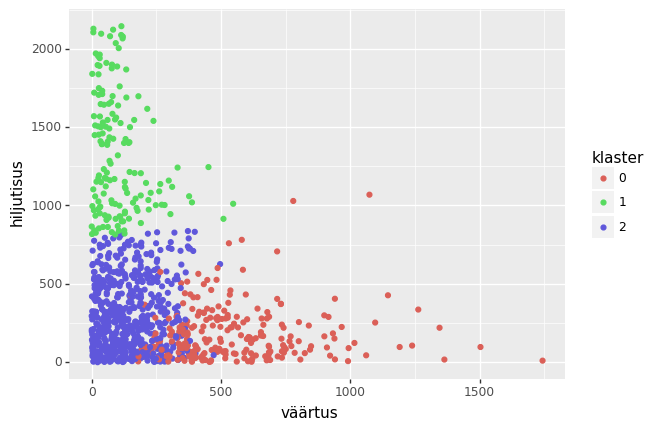

<ggplot: (8790755979529)>

In [ ]:
#teisendame klastri visualiseerimise jaoks sõnedeks, et plotnine 
#oskaks seda lugeda kategooriana mitte pideva väärtusena
hsv["klaster"] = hsv["klaster"].astype(str)

#esimene kiht - määrame andmestiku ja kasutatavad tulbad
(p9.ggplot(data = hsv,
           mapping=p9.aes(x="väärtus", 
                          y="hiljutisus",
                          color="klaster")) + #teeme iga maksevahendi tehingud eri värvi
           #teine kiht - küsime ülal defineeritud andmetel punktdiagrammi
           p9.geom_point())



In [ ]:
#teisendame klastri tagasi arvuks
hsv["klaster"] = hsv["klaster"].astype(int)

Kuna praegu klasterdame ainult 3 tunnuse alusel, siis on tegelikud 3D abil võimalik ühel joonisel kujutada ka kõigi kolme tunnuse suhet. Kasutame selle jaoks `plotnine` asemel `matplotlibi`. Mäletate, et kolmandas praktikumis oli juttu, kuidas `matplotlibi` abil on keerukate jooniste tegemiseks pisut rohkem võimalusi? See on üks nendest olukordadest.

Text(0.5, 0, 'sagedus')

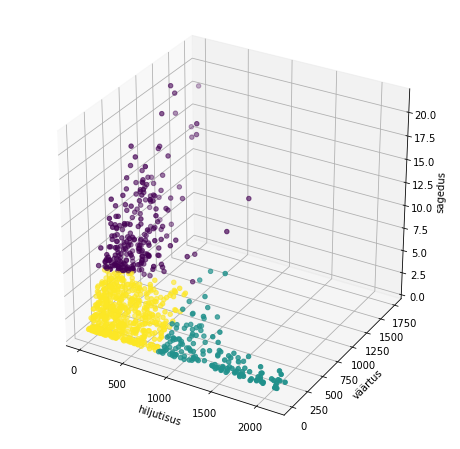

In [ ]:
# 3-d visualiseerimine matplotlib teegiga 
plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
ax.scatter(hsv["hiljutisus"], hsv["väärtus"], hsv["sagedus"], c=hsv["klaster"])
ax.set_xlabel("hiljutisus")
ax.set_ylabel("väärtus")
ax.set_zlabel("sagedus")

# Kliendi eluagne väärtus (KEV) ja selle ennustamine

*Materjal baseerub Anna Leontjeva loodud materjalil*

Selles osas vaatame, kuidas arvutada kliendi eluaja väärtust (KEV) ning kuidas saab rakendada lineaarset regressiooni uue kliendi KEVi ennustamiseks.

**Kõik andmed on jätkuvalt kunstlikud ja ei peegelda reaalsust**

## Andmete sisselugemine

Kõigepealt laeme vajalikud Pythoni paketid ehk teegid 

In [ ]:
# andme töötlemisega seotud teegid
import pandas as pd
import numpy as np


# visualiseerimisega seotud teegid
import matplotlib.pyplot as plt

Kuna soovime arvutada väärtusi erinevatel segmentidel eraldi, kasutame ka siin juba ülal loodud klastreid.

Kuvame need meeldetuletuseks uuesti:



In [ ]:
display(hsv.head())
print(hsv.shape)

,sagedus,väärtus,hiljutisus,klaster
kliendi_id,,,,
1,1,146.72,1214,1
2,8,381.76,433,0
3,7,613.99,143,0
4,1,2.34,177,2
5,2,214.40,264,2


(1000, 4)


## Kliendi eluaja väärtuse arvutamine

Tuletame meelde, kuidas me defineerisime kliendi eluaja väärtuse (KEV). Kasutame seda loengus antud valemit meie analüüsis:

<div>
<img class="center" src="https://drive.google.com/uc?id=1ULOoWg592uuIJt8ogfq797cbAEdvZcwZ" />
</div>

Selleks, et arvutada KEV iga kliendi kohta, peame natuke ka andmeid eeltöötlema. Nimelt, **lisame varasemalt leitud klastri numbri nüüd tehingute andmestikule.** 

Lisaks lisame ka uue tunnuse `kuu_aasta`, et saaksime analüüsi teostada kuu täpsusega. Hakkame sulgudes olevat valemiosa arvutama iga kuu kohta ja eluiga mõõtma kuudes.

Nagu valemist näeme, on meil vaja uued mõõdikud arvutada:
- kliendi eluea pikkus
- keskmine tehingu väärtus iga kliendi jaoks
- ostude sagedus kliendi kohta

In [ ]:
# ühendame kaks andmetabelit: andmestik ja hsv
#hsv tabelist vajame ainult "klaster" veergu
# Mis on ühine veerg, mis lubab tabelid ühendada?
df_klastriga = pd.merge(tehingud, hsv[['klaster']], how='inner', on="kliendi_id")


# lisame uue tunnuse
df_klastriga['kuu_aasta'] = pd.to_datetime(df_klastriga['tehingu_kuupäev']).dt.to_period('M') # "M" siin tähendab month, ehk kuu
# võid selle juppideks lahti võtta
#df_klastriga['kuu_aasta'] = pd.to_datetime(df_klastriga['tehingu_kuupäev']) #teeme kuupäevaks
#df_klastriga['kuu_aasta'] = df_klastriga['kuu_aasta'].dt.to_period('M') #muudame kuu täpsuseks

df_klastriga.head(10)

,tehingu_id,tehingu_kuupäev,kliendi_id,ostusumma,maksevahend,aasta,klaster,kuu_aasta
0,1,2015-09-04,1,146.72,arve,2015,1,2015-09
1,2,2015-05-15,2,86.96,sularaha,2015,0,2015-05
2,3,2017-05-23,2,17.68,kaart,2017,0,2017-05
3,4,2017-10-24,2,83.84,arve,2017,0,2017-10
4,5,2015-10-13,2,31.52,arve,2015,0,2015-10
5,6,2016-01-23,2,98.96,arve,2016,0,2016-01
6,7,2017-03-09,2,12.72,sularaha,2017,0,2017-03
7,8,2016-11-17,2,22.00,kaart,2016,0,2016-11
8,9,2017-10-10,2,28.08,sularaha,2017,0,2017-10
9,10,2015-11-26,3,212.20,arve,2015,0,2015-11


Defineerime **lisafunktsiooni**, mis arvutab tunnuse "kuu_aasta" maksimumi ja miinimumi vahe, ehk kliendisuhte pikkuse. `astype(int)` tõlgendab kuupäevad numbriliseks väärtuseks.

In [ ]:
def eluaeg(x): 
    return max(x.astype(int)) - min(x.astype(int))

Näeme, et kliendid, kes tegid oste ainult ühel kuul saavad elueaks 0 (näiteks ühe ostuga kliendid).

Järgmisena grupeerime andmestiku kliendi id järgi ning rakendame meie poolt kirjutatud funktsiooni, et arvutada **kliendi eluaeg** kuudes, ehk kui pikalt klient oli aktiivne ja teostas internetipoes tehinguid. 
- Kasutame `groupby` funktsiooni iga kliendi eraldi vaatamiseks
- Kasutame `agg` funktsiooni, mis lubab tabeli mingile veerule rakendada mingit funktsiooni. Saab rakendada teatud tuntud funktsioone ("mean", "min", "max", "first" jne), aga siin rakendatame oma enda funktsiooni "eluaeg".

In [ ]:
kliendi_eluaeg = df_klastriga.groupby("kliendi_id").agg({'kuu_aasta': eluaeg}) #agg rakendab veerule "kuu_aasta" funktsiooni eluaeg
kliendi_eluaeg.columns = ['eluaeg'] # saadud andmefreimil polnud veel nime

In [ ]:
kliendi_eluaeg.head() #visualiseerime esimesed 5 väärtust
# näeme, et kliendi ID-st on saanud indeks

,eluaeg
kliendi_id,
1,0
2,29
3,33
4,0
5,3


Arvutame ka teised komponendid valemis: **ostude sageduse** ja **tehingu keskmise väärtuse** iga kliendi kohta. Nüüd peame grupeerima nii, et arvutuskäik toimuks iga kliendi kohta kuiselt. Seega grupeerime kahe tunnuse põhjal, *kliendi_ID* ja *kuu_aasta*. 

In [ ]:
aegrida = df_klastriga.groupby(['kliendi_id', "kuu_aasta"])

#Meil on nüüd justkui terve hulk tabeleid, iga kliendi ja kuu kohta eraldi tabel, mis sisaldab
# selle kliendi selle kuu tehinguid

# "count" abil mõnes veerus olevad väärtused kokku lugedes (read kokku lugedes) saame sageduse
# ostusummade veeru kohta vajame keskmist (mean)
# klaster on kõigil ridadel sama, nii et piisab esimese väärtuse küsimisest (first)
aegrida = aegrida.agg({'kliendi_id': 'count', 
                                    'ostusumma':'mean',
                                    'klaster': 'first'})


aegrida.columns = ['sagedus', 'väärtus', 'klaster'] #anname nimed
aegrida.reset_index(inplace=True) #võib proovida ilma?

In [ ]:
# vaatame loodud andmeid
aegrida.head()

,kliendi_id,kuu_aasta,sagedus,väärtus,klaster
0,1,2015-09,1,146.72,1
1,2,2015-05,1,86.96,0
2,2,2015-10,1,31.52,0
3,2,2016-01,1,98.96,0
4,2,2016-11,1,22.00,0


**Paneme vajalikud andmed kokku**

Meil on aegrida freimis peaaegu kõik olemas, lisaks on vaja kliendi eluaega.

In [ ]:
kliendi_KEV_komponendid = pd.merge(aegrida, kliendi_eluaeg, how='inner', on='kliendi_id')
kliendi_KEV_komponendid.head()

,kliendi_id,kuu_aasta,sagedus,väärtus,klaster,eluaeg
0,1,2015-09,1,146.72,1,0
1,2,2015-05,1,86.96,0,29
2,2,2015-10,1,31.52,0,29
3,2,2016-01,1,98.96,0,29
4,2,2016-11,1,22.00,0,29


Nüüd on puudu ainult **kasumimarginaali väärtus**. Oletame, et meie poe toodete puhul on see 20%.

In [ ]:
kasumimarginaal = 0.2

Nüüd korrutame kõik arvutatud väärtused kokku, mille tulemusena saame iga kliendi jaoks vastava kuu KEVi.

**Tähelepanu** siin me seame kliendi elueaks alati, igal kuul tema terve kliendisuhte pikkuse. Meil pole mingit mudelit, mis ütleks meile, kui kaua klient, kes on juba 2 kuud/12kuud/24kuud klient olnud veel aktiivne püsib. Meie "pood" ei läinud andmestiku lõppkuupäevaga kinni ja kõik kliendid ei lahkunud, nii et nende eluaeg ei lõpe viimasel kuul vaid jätkub teadmata kaua.

Sellises analüüsis oleks hea tegelikult luua mingi mudel, loogika, kuidas leida "eeldatav eluiga" igale kliendile. See on muidugi omaette keerukus. Võib kasutada ajaloolisi andmeid ja kliente hetke elueea järgi gruppeerides saada neile ennustuse ("klient kes on juba 3 kuud aktiivne olnud on keskmiselt aktiivne veel 9 kuud"), aga muidugi on keerulisemaid viise.

Hetkel lepime sellega, et meie "eluiga" veerg sisaldab lihtsalt kliendi eluiga, mitte mingit täpset ennustust. 

In [ ]:
#vaata ülalt valemit, kui vaja
kliendi_KEV_komponendid['KEV_kuine'] = kasumimarginaal * kliendi_KEV_komponendid['sagedus'] * kliendi_KEV_komponendid["väärtus"]  * kliendi_KEV_komponendid["eluaeg"]
display(kliendi_KEV_komponendid.head())
print(kliendi_KEV_komponendid.shape)

,kliendi_id,kuu_aasta,sagedus,väärtus,klaster,eluaeg,KEV_kuine
0,1,2015-09,1,146.72,1,0,0.000
1,2,2015-05,1,86.96,0,29,504.368
2,2,2015-10,1,31.52,0,29,182.816
3,2,2016-01,1,98.96,0,29,573.968
4,2,2016-11,1,22.00,0,29,127.600


(3953, 7)


Nüüd saaksime iga kliendi kohta uurida, kuidas tema väärtus muutub ajas.

Ehk kas klient hakkab tooma rohkem kasumit või pigem vastupidi? Kuid iga kliendi läbi vaatamine tundub väga ajakulukas, keskmine väärtus iga segmendi kohta on palju mõistlikum.

In [ ]:
display(kliendi_KEV_komponendid)

,kliendi_id,kuu_aasta,sagedus,väärtus,klaster,eluaeg,KEV_kuine
0,1,2015-09,1,146.72,1,0,0.000
1,2,2015-05,1,86.96,0,29,504.368
2,2,2015-10,1,31.52,0,29,182.816
3,2,2016-01,1,98.96,0,29,573.968
4,2,2016-11,1,22.00,0,29,127.600
...,...,...,...,...,...,...,...
3948,1000,2016-07,1,72.23,0,65,938.990
3949,1000,2017-01,1,24.94,0,65,324.220
3950,1000,2017-04,1,103.80,0,65,1349.400
3951,1000,2018-01,1,20.91,0,65,271.830


In [ ]:
#iga klastri iga kuu keskmine
KEV_aegrida_segmendi_kaupa = kliendi_KEV_komponendid.groupby(['kuu_aasta', 'klaster']).agg({'KEV_kuine': 'mean'}).unstack()
#unstack paneb tagasi ühte tabelisse kokku

#anname klastritele nimed
KEV_aegrida_segmendi_kaupa.columns = ["väärtuslikud","madala_väärtusega", "potentsiaalsed"]
display(KEV_aegrida_segmendi_kaupa.head())

print(KEV_aegrida_segmendi_kaupa.dtypes, "\n")


,väärtuslikud,madala_väärtusega,potentsiaalsed
kuu_aasta,,,
2013-01,734.599091,757.3800,NaN
2013-02,831.644667,260.7904,729.966800
2013-03,864.743000,29.4195,464.958333
2013-04,657.442000,180.1140,632.619000
2013-05,763.101067,52.0300,536.586250


väärtuslikud         float64
madala_väärtusega    float64
potentsiaalsed       float64
dtype: object 



Ja nüüd saame ka iga segmendi klientide keskmise väärtuse muutust visualiseerida:

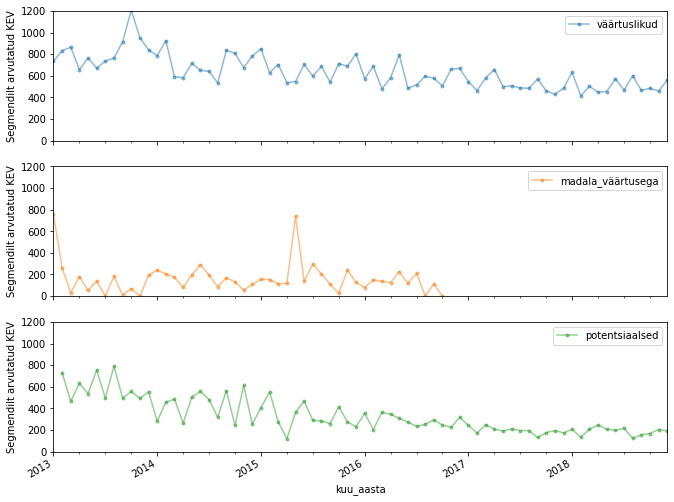

In [ ]:
# kasutame Pandasesse sisse ehitatud joonistamist
# dolumentatsioonist: Each Series in a DataFrame can be plotted on a different axis with the subplots keyword
axes = KEV_aegrida_segmendi_kaupa.plot(marker='.', alpha=0.5, figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Segmendilt arvutatud KEV')
    ax.set_ylim(0,1200)


# otse matplotlibiga tehes tekib probleem andemetüübiga, sest funktsioon ei tea mida
# kuupäevadega x-teljel peale hakata. Samuti tuleb käsitsi defineeriga jooniste arv ja paigutus,
# värvid, telgede suurused jne. 


#f = plt.figure(figsize=(12,10))
#ax1 = f.add_subplot(311) #lisa alamjoonis. 311 tähendab, et meil on 3 rida, 1 veergu ja käesoleva onjekti lisame kohale 1
#ax2 = f.add_subplot(312) #lisa alamjoonis. 312 tähendab, et meil on 3 rida, 1 veergu ja käesoleva onjekti lisame kohale 2
#ax3 = f.add_subplot(313) #lisa alamjoonis. 313 tähendab, et meil on 3 rida, 1 veergu ja käesoleva onjekti lisame kohale 2

#print(KEV_aegrida_segmendi_kaupa.keys)
#kuud_numbritena = KEV_aegrida_segmendi_kaupa.index.astype(int)
#ax1.plot(kuud_numbritena ,KEV_aegrida_segmendi_kaupa["väärtuslikud"])
#ax2.plot(kuud_numbritena ,KEV_aegrida_segmendi_kaupa["madala_väärtusega"],color="r")
#ax3.plot(kuud_numbritena ,KEV_aegrida_segmendi_kaupa["potentsiaalsed"])

#for ax in [ax1,ax2,ax3]:
#    ax.set_ylabel('Segmendilt arvutatud KEV')
#    ax.set_ylim(0,1200)
#    ax.set_xlim(kuud_numbritena.min(),kuud_numbritena.max())
#    #oleks vaja x-teljele kuupäevad tagasi panna"""

Tundub, et on õige aeg selleks, et pakkuda klientidele soodustust. Või hoopis teha üles- või ristmüüki. Igas segmendis on näha negatiivset trendi, kliendid ostavad vähem.

# Regressiooni näide

Järgmisena proovime ennustada uute klientide eluaegset väärtust. Oletame, et kogusime ka klientide profiiliinfot nagu elukoht, vanus ja **kodulehel tehtud hiireklõpsude arv**. Loeme ka need andmed sisse:


In [ ]:
!wget https://courses.cs.ut.ee/2021/atva_stataine/fall/uploads/Main/kliendid_v2.csv

klientide_lisainfo = pd.read_csv("kliendid_v2.csv").set_index("kliendi_id")
display(klientide_lisainfo.head())

--2021-10-21 12:27:42--  https://courses.cs.ut.ee/2021/atva_stataine/fall/uploads/Main/kliendid_v2.csv
Resolving courses.cs.ut.ee (courses.cs.ut.ee)... 193.40.36.57, 193.40.36.55
Connecting to courses.cs.ut.ee (courses.cs.ut.ee)|193.40.36.57|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /LTAT.02.020/2021_fall/uploads/Main/kliendid_v2.csv [following]
--2021-10-21 12:27:43--  https://courses.cs.ut.ee/LTAT.02.020/2021_fall/uploads/Main/kliendid_v2.csv
Reusing existing connection to courses.cs.ut.ee:443.
HTTP request sent, awaiting response... 200 OK
Length: 16244 (16K) [text/csv]
Saving to: ‘kliendid_v2.csv.1’

kliendid_v2.csv.1   100%[===================>]  15.86K  --.-KB/s    in 0s      

2021-10-21 12:27:44 (186 MB/s) - ‘kliendid_v2.csv.1’ saved [16244/16244]



,kliendi_vanus,kliendi_elukoht,veebi_hiireklikid
kliendi_id,,,
1,27,Tallinn,1
2,57,Tartu,8
3,44,Tallinn,7
4,79,Tartu,1
5,45,Tallinn,2


Meil on nüüd info klientide kohta. Tahame hakata ennustama iga kliendi KEVi. Tegelesimegi ülal just KEVi arvutamisega, aga tegime seda iga kuu kohta eraldi. Võtame nüüd **KEVide keskmise** üle kuude iga inimese jaoks. 

In [ ]:
#grupeerime nii et iga kliendi kohta on tabel, seejärel võtame keskmise vastavast veerust
keskmine_KEV = kliendi_KEV_komponendid.groupby('kliendi_id').agg({'KEV_kuine': 'mean'})
display(keskmine_KEV)

,KEV_kuine
kliendi_id,
1,0.000000
2,316.315429
3,675.389000
4,0.000000
5,64.320000
...,...
996,32.736000
997,168.390000
998,646.524000


Lisame selle veeru klientide kohta teada olevate andmete tabelisse.

In [ ]:
klientide_lisainfo["KEV"] = keskmine_KEV["KEV_kuine"] #seda saaks ka merge funktsiooniga
klientide_lisainfo.head()

,kliendi_vanus,kliendi_elukoht,veebi_hiireklikid,KEV
kliendi_id,,,,
1,27,Tallinn,1,0.000000
2,57,Tartu,8,316.315429
3,44,Tallinn,7,675.389000
4,79,Tartu,1,0.000000
5,45,Tallinn,2,64.320000


Kasutame **paarisdiagrammi**, et kiiresti hinnata andmete kvaliteeti ja potentsiaali ning leida andmetega seotud võimalikke probleeme. 

Kuna muidu peaksime tegema for-tsükliga päris pika koodijupi, siis võtame siin kasutusele veel ühe teegi.

**Vaatame ainult joonist, te ei pea seda koodi mõistma**

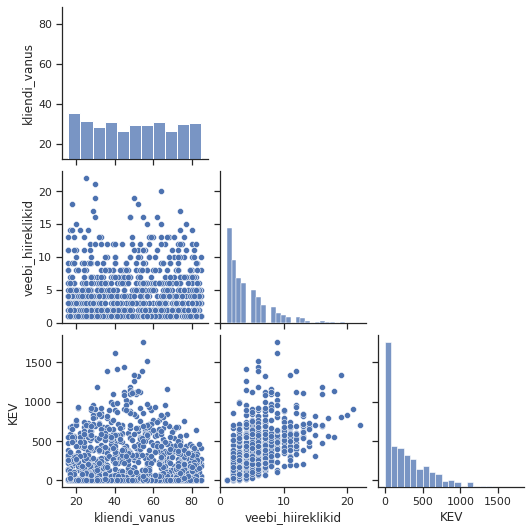

In [ ]:
import seaborn as sns

# paarisdiagramm
sns.set(style="ticks")
g = sns.pairplot(klientide_lisainfo)

#ülemine osa on kordus, pole vaja visualiseerida
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

Diagonaalil on näidatud histogrammid (vastavate tunnuste väärtuste jaotused), diagonaalist allpool on tunnustevahelised hajuvusdiagrammid.

Näiteks, viimane veerg näitab  

1. Vasakul: KEVi ja kliendi vanuse tunduvad üksteisest sõltuvat, aga mitte tugevalt ja mitte lineaarselt. Pigem on näha, et keskealised kulutavad rohkem.
2. Keskel: veebi hiireklõpsude ja KEVi vahel võib aimata lineaarset seost, kuna punktide pilv on pigem diagonaali ümber;
3. Paremal: KEVide histogram. Näeme et magala keskmise kuise KEV väätusega inimesi on palju, kasumlikke kliente on vähem.

Kategoorilisi muutujaid paarisdiagramm ei kuva. Klientide elukoha järgi jaotuse hindamiseks saame arvutada kui palju on meie andmestikus tartlasi ja tallinnlasi ning arvutada keskmised linna kaupa.

In [ ]:
print(klientide_lisainfo.kliendi_elukoht.value_counts())
print("\n Tartu: \n",klientide_lisainfo[klientide_lisainfo["kliendi_elukoht"]=="Tartu"]["KEV"].describe())

print("\n Tallinn: \n", klientide_lisainfo[klientide_lisainfo["kliendi_elukoht"]=="Tallinn"]["KEV"].describe())

Tallinn    600
Tartu      400
Name: kliendi_elukoht, dtype: int64

 Tartu: 
 count     400.000000
mean      278.873339
std       303.059605
min         0.000000
25%        17.740500
50%       187.513667
75%       428.240000
max      1759.057143
Name: KEV, dtype: float64

 Tallinn: 
 count     600.000000
mean      264.783233
std       300.744189
min         0.000000
25%         0.000000
50%       168.355000
75%       432.686369
max      1512.604800
Name: KEV, dtype: float64


Erilisi erinevusi linnade vahel on meie andmestikus raske näha.


Andmete ettevalmistamiseks arvutuslike mudaite jaoks on vaja kategoorilised muutujat viia üks-mitmest kujule. Hetkel on meil linna variante ainult 2, saame lihtsalt panna Tartule vastama 0 ja Tallinnale 1.

In [ ]:
klientide_lisainfo = klientide_lisainfo.replace({"Tartu": 0, "Tallinn": 1})
klientide_lisainfo.head()

,kliendi_vanus,kliendi_elukoht,veebi_hiireklikid,KEV
kliendi_id,,,,
1,27,1,1,0.000000
2,57,0,8,316.315429
3,44,1,7,675.389000
4,79,0,1,0.000000
5,45,1,2,64.320000



Nüüd on kõik andmed arvulisel kujul ja valmis õppimisalgoritmi sisse panekuks.

Laadime nüüd vajalikud teegid, et saaksime **regressioonimudelit** treenida, et ennustada uute klientide KEVi:

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

Järgmisena, eraldame klientide tunnused (X) ja huvialuse sõltumatu tunnuse (märgendi), ehk KEV (y). 

`test_size` parameeter näitab, kui suure osa andmestikust me eraldame testandmestikuks. Antud juhul 20% andmeridadest paneme kõrvale ja treenime mudeli kasutades ülejäänud 80% andmetest. Eraldi andmestiku kasutamine mudeli täpsuse hindamisel on oluline, sellest saab lähemalt lugeda siit: https://courses.cs.ut.ee/2020/Tehisintellekti_algkursus/spring/Main/PARTIIOverfitting.

In [ ]:
X = klientide_lisainfo.drop('KEV', axis=1)
y = klientide_lisainfo['KEV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Selleks, et veenduda, et see funktsioon käitus ootusepäraselt, prindime andmestiku kuju välja:

In [ ]:
print(X_train.shape)
print(X_test.shape)

(800, 3)
(200, 3)


Nüüd on kõik valmis, et treenida regressioonimudel. Selleks tekitame LinearRegression tüüpi objekti, mis tähendab lineaarset mudelit. 

Kasutame parameetreid nagu `fit_intercept = True` ja `normalize = True`, ehk tahame, et nihe oleks mudelis esindatud, ning enne mudeli jooksmist on vaja andmeid normaliseerida. Parameetrite kohta saab lähemalt lugeda siit: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Seejärel, sobitame mudeli kasutades tekitatud objekti `mudel` juurde kuuluvat `fit` funktsiooni, mille sisendiks on treeningandmestik. Viimase sammuna kasutame treenitud mudelit testandmestiku peal ennustamiseks (funktsioon `predict`)

In [ ]:
mudel = linear_model.LinearRegression(fit_intercept=True, normalize=True)
mudel.fit(X_train, y_train)#selle rea käivitamise järel on meil mudel!!!
y_pred = mudel.predict(X_test)

#võid vaadate ennustusi individuaalselt
#print(np.round(y_test[:10].values,3))
#print(np.round(y_pred[:10],3)) # ennustused kümnele esimesele kliendile testandmestikust

Meil on nüüd mudel, mis ennustab klientide tunnuste põhjal nende KEVi. Nende ennustatud väärtuste põhjal, kui me neid piisavalt usaldame, saab teha ärilisi otsuseid. 

Kas kulutada sama palju ressurrsi kliendile, kelle väärtuseks hindab mudel 102eurot kui sellele, kelle omaks 0.088? Isegi kui me seda mudelit täielikult ei usalda, on see vahe nii suur, et selle põhjal mingit klientide filtreerimist teostada.

Et aga otsustada, kas me mudelit ülde usaldada saame vaatame milline ta matemaatliselt välja näeb ja arvutame ka tema täpsuse kohta mõned mõõdikud.




Arvestades meie sisendeid on mudeli üldine kuju selline: $$\hat{\text{KEV}} \sim w_0 + w_1 \times \text{vanus} + w_2 \times \text{elukoht} + w_3 \times \text{veebi hiireklõpsud}$$

Alguses vaatame, millises järjekorras on mudelisse sisestatud tunnused:

In [ ]:
X_train.columns

Index(['kliendi_vanus', 'kliendi_elukoht', 'veebi_hiireklikid'], dtype='object')

Mudeli kordajaid $w_i$ saame teada kasutades objekti nime ja `coef_` funktsiooni:

In [ ]:
mudel.coef_

array([-1.34468647,  2.38100548, 57.71644387])

Nihke ehk $w_0$ saame teada kasutades funktsiooni `intercept_`:

In [ ]:
mudel.intercept_

92.53326152239663

Vormistame nüüd tulemused ilusamaks väljundiks.

$$\hat{\text{KEV}} = 92.53 + 2.38 \times \text{linn}  -1.34 \times \text{vanus} + 57.7 \times \text{klikid}$$
<br>
<br>
Kasutame kahte täpsuse mõõdikut: keskmine **ruutviga ja determinatsioonikordaja.** 

Mõlemad on jällegi kättesaadaval `sklearn` paketist ja nõuavad sisendiks **testandmestiku** märgendeid ja mudeli poolt tehtud ennustusi. Ennustusi ja õigeid vastuseid võrdlemegi omavahel, et hinnata, kui täpselt loodud mudel uute andmete peal ennustab.

In [ ]:
print('Kordajad: \n {}'.format(np.round(mudel.coef_, 2))) 
print('Keskmine ruutviga: {}'.format(mean_squared_error(y_test, y_pred)))
print('Determinatsioonikordaja r2: {}'.format(r2_score(y_test, y_pred)))

Kordajad: 
 [-1.34  2.38 57.72]
Keskmine ruutviga: 47202.662159443644
Determinatsioonikordaja r2: 0.4480658908723695


Saame mudelit hinnata ka tulemusi visualiseerides kasutades selleks hajuvusdiagrammi, kus x-teljel on testandmestiku tegelik KEV ja y-teljel on mudeli ennustatud KEV. Kui mudeli ennustused oleks ideaalselt täpsed, asuks kõik punktid diagnoaalin (märgitud punase joonega)

In [ ]:
np.set_printoptions(suppress=True) # et ei kuvaks numbreid kujul 1.4e+10

results = "Mudeli kordajad: \n "+str(np.round(mudel.coef_, 2))+"\n Vabaliige: "+ str(np.round(mudel.intercept_, 2))+"\n Keskmine ruutviga: "+str(np.round(mean_squared_error(y_test, y_pred),2))+" \n Determinatsioonikordaja" +str(np.round(r2_score(y_test, y_pred),3))

Text(0, 0.5, 'Ennustatud KEV')

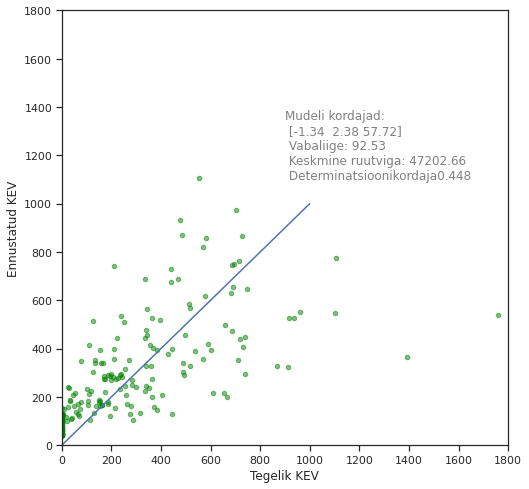

In [ ]:

fig= plt.figure(figsize=[8,8])
plt.scatter(y_test,y_pred,s=20,c="green",alpha=0.5)
plt.xlim([0,1800])
plt.ylim([0,1800])
plt.plot([0,1000],[0,1000])
plt.text(900, 1100, results, horizontalalignment='left', size='medium', color='grey')
plt.xlabel("Tegelik KEV")
plt.ylabel("Ennustatud KEV") 

Joonisel on näha et mudel ennustab suhteliselt hästi väikeste KEV väärtuste puhul, kuid alahindab KEVi kõrgemaid väärtusi (vt. punktid paremal servas).

Selle analüüsi eesmärk oli ennustada klientide tulevast või oodatavat KEVi. Näiteks, uute klientide puhul saame nende tunnuste põhjal ennustada neilt teenitavat potentsiaalset kasumit ja pakkuda soodustusi juba varakult.  

## KODUS PUSIMISEKS

Kuna me teame, kuidas me oma andmed tegelikult tekitasime, siis teame, et ostusumma sõltus vanusest nii, et keskmiselt suurimad summad olid vanusel 45. Mida kaugelam vanus 45-st on, seda väiksemad on keskmised summad. Võime luua muutuja, mis mõõdab vanuse erinevust 45st ning proovida treenida lineaarse mudeli, mis vanuse asemel seda teadmist arvesse võtab.

In [ ]:
klientide_lisainfo.head()
klientide_lisainfo["vanuse_erinevus"] = np.abs(klientide_lisainfo["kliendi_vanus"]-45)
klientide_lisainfo_muudetud = klientide_lisainfo.drop("kliendi_vanus",axis=1)
klientide_lisainfo_muudetud.head()

,kliendi_elukoht,veebi_hiireklikid,KEV,vanuse_erinevus
kliendi_id,,,,
1,1,1,0.000000,18
2,0,8,316.315429,12
3,1,7,675.389000,1
4,0,1,0.000000,34
5,1,2,64.320000,0


Võite järgida kõiki eelmisi samme:
- andmet ejagamine treening ja test andmestikuks
- mudeli loomine
- optimeerimine
- ennustuste arvutamine
- täpsuse mõõtmine ja visualiseerimine

In [ ]:
#Kirjuta siia kood, mis teeks läb need sammud
#Peaksid saama sarnase joonise nagu see siin. Lahendus on antud allpool.

## Kodus pusimise lahendus

Kordajad: 
 [ 9.21 57.61 -6.82]
Keskmine ruutviga: 41862.66709868481
Determinatsioonikordaja r2: 0.5105057042593824


Text(0, 0.5, 'Ennustatud KEV')

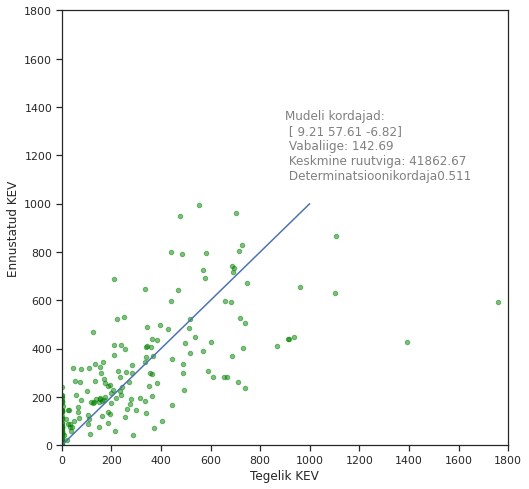

In [ ]:
X = klientide_lisainfo_muudetud.drop('KEV', axis=1)
y = klientide_lisainfo_muudetud['KEV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mudel = linear_model.LinearRegression(fit_intercept=True, normalize=True)
mudel.fit(X_train, y_train)
y_pred = mudel.predict(X_test)


print('Kordajad: \n {}'.format(np.round(mudel.coef_, 2))) 
print('Keskmine ruutviga: {}'.format(mean_squared_error(y_test, y_pred)))
print('Determinatsioonikordaja r2: {}'.format(r2_score(y_test, y_pred)))

np.set_printoptions(suppress=True)
results = "Mudeli kordajad: \n "+str(np.round(mudel.coef_, 2))+"\n Vabaliige: "+ str(np.round(mudel.intercept_, 2))+"\n Keskmine ruutviga: "+str(np.round(mean_squared_error(y_test, y_pred),2))+" \n Determinatsioonikordaja" +str(np.round(r2_score(y_test, y_pred),3)) 


fig= plt.figure(figsize=[8,8])
plt.scatter(y_test,y_pred,s=20,c="green",alpha=0.5)
plt.xlim([0,1800])
plt.ylim([0,1800])
plt.plot([0,1000],[0,1000])
plt.text(900, 1100, results, horizontalalignment='left', size='medium', color='grey')
plt.xlabel("Tegelik KEV")
plt.ylabel("Ennustatud KEV") 